In [1]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from zipfile import ZipFile

In [11]:
data_folder = './data/'
zip_file = ZipFile(data_folder+'russian-troll-tweets.zip')
fs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}

In [12]:
data=pd.DataFrame()
for key,val in fs.items():
    data=pd.concat([data,val])

In [13]:
data['publish_date'] =  pd.to_datetime(data['publish_date'], format='%m/%d/%Y %H:%M')

In [21]:
grouped = data.groupby(['publish_date']).size().reset_index(name='counts')

In [24]:
grouped.head()

,publish_date,counts
0,2012-02-02 00:35:00,1
1,2012-02-02 00:58:00,1
2,2012-02-02 15:40:00,1
3,2012-02-02 19:31:00,1
4,2012-02-04 09:11:00,1


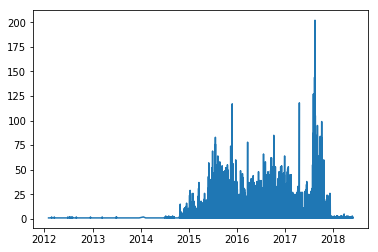

In [16]:
plt.plot(grouped['publish_date'], grouped['counts'])

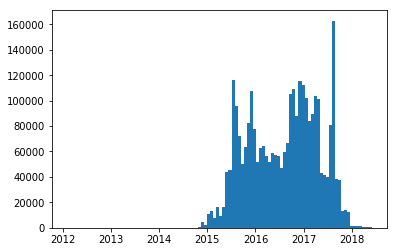

In [17]:
plt.hist(data.publish_date,bins=100)
plt.show()

In [29]:
data_sense = data.loc[data['publish_date'] < '2017-05'] 

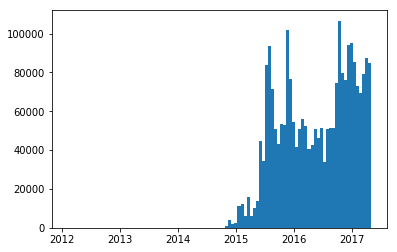

In [30]:
plt.hist(data_sense.publish_date,bins=100)
plt.show()

In [31]:
data_recent = data_sense.loc[data_sense['publish_date'] > '2015'] 

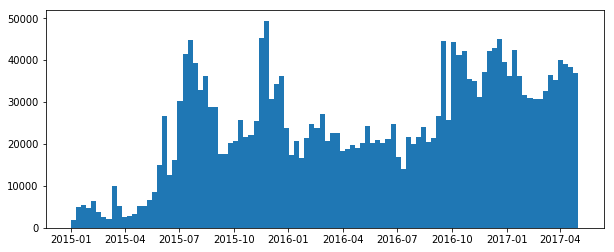

In [33]:
fig=plt.figure(figsize=(10,4))
plt.hist(data_recent.publish_date,bins=100)
plt.show()